<a href="https://colab.research.google.com/github/davidmorme/Universidad/blob/main/Diversi%C3%B3n/An%C3%A1lisis_Dolar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
Dolar=pd.read_csv('Tasa_de_Cambio_Representativa_del__Mercado_-Historico.csv')

In [5]:
Dolar

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
0,2850.98,COP,09/10/2002,09/10/2002
1,2854.04,COP,10/10/2002,10/10/2002
2,2870.63,COP,11/10/2002,11/10/2002
3,2861.16,COP,12/10/2002,15/10/2002
4,2852.99,COP,16/10/2002,16/10/2002
...,...,...,...,...
7284,3401.56,COP,04/02/2020,04/02/2020
7285,3774.25,COP,22/05/2020,22/05/2020
7286,3839.73,COP,09/10/2020,09/10/2020
7287,3578.02,COP,18/03/2021,18/03/2021


In [6]:
Dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7289 entries, 0 to 7288
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   VALOR          7289 non-null   float64
 1   UNIDAD         7289 non-null   object 
 2   VIGENCIADESDE  7289 non-null   object 
 3   VIGENCIAHASTA  7289 non-null   object 
dtypes: float64(1), object(3)
memory usage: 227.9+ KB


In [7]:
Dolar['VIGENCIADESDE']=pd.to_datetime(Dolar['VIGENCIADESDE'],format="%d/%m/%Y")
Dolar['VIGENCIAHASTA']=pd.to_datetime(Dolar['VIGENCIAHASTA'],format="%d/%m/%Y")

In [8]:
Dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7289 entries, 0 to 7288
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   VALOR          7289 non-null   float64       
 1   UNIDAD         7289 non-null   object        
 2   VIGENCIADESDE  7289 non-null   datetime64[ns]
 3   VIGENCIAHASTA  7289 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 227.9+ KB


In [9]:
Dolar['UNIDAD'].unique()

array(['COP'], dtype=object)

In [10]:
Dolar.sort_values(by='VIGENCIADESDE',inplace=True)
Dolar.reset_index(drop=True, inplace=True)

In [11]:
Dolar

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
0,643.42,COP,1991-12-02,1991-12-02
1,639.22,COP,1991-12-03,1991-12-03
2,635.70,COP,1991-12-04,1991-12-04
3,631.51,COP,1991-12-05,1991-12-05
4,627.16,COP,1991-12-06,1991-12-06
...,...,...,...,...
7284,3836.56,COP,2022-03-16,2022-03-16
7285,3826.89,COP,2022-03-17,2022-03-17
7286,3816.43,COP,2022-03-18,2022-03-18
7287,3820.67,COP,2022-03-19,2022-03-22


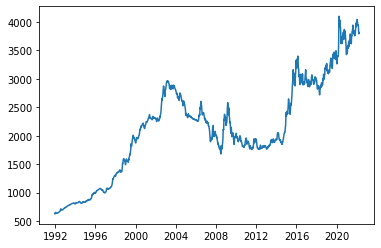

In [12]:
plt.plot(Dolar['VIGENCIADESDE'],Dolar['VALOR'].rolling(7).mean())
plt.show()

In [13]:
Dolar['VIGENCIAHASTA']-Dolar['VIGENCIADESDE']

0      0 days
1      0 days
2      0 days
3      0 days
4      0 days
        ...  
7284   0 days
7285   0 days
7286   0 days
7287   3 days
7288   0 days
Length: 7289, dtype: timedelta64[ns]

In [14]:
dates = pd.DataFrame(pd.date_range(start=min(Dolar['VIGENCIADESDE']), end=max(Dolar['VIGENCIAHASTA'])))

In [15]:
Dolar2 = pd.merge(left=dates,right=Dolar, how='left', left_on=0, right_on='VIGENCIADESDE')
Dolar2.rename(columns={0:'FECHA'},inplace=True)
Dolar2['VALOR'].fillna(method='ffill',inplace=True)
Dolar2.drop(['UNIDAD','VIGENCIADESDE','VIGENCIAHASTA'], axis=1,inplace=True)
Dolar2

,FECHA,VALOR
0,1991-12-02,643.42
1,1991-12-03,639.22
2,1991-12-04,635.70
3,1991-12-05,631.51
4,1991-12-06,627.16
...,...,...
11065,2022-03-19,3820.67
11066,2022-03-20,3820.67
11067,2022-03-21,3820.67
11068,2022-03-22,3820.67


In [16]:
Dolar2['%Var']=100*(Dolar2[['VALOR']][1:11070].reset_index(drop=True)-Dolar2[['VALOR']][0:11069])/Dolar2[['VALOR']][0:11069]

In [17]:
Dolar2['%Var'].rolling(30).sum()

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
11065   -3.337849
11066   -2.679911
11067   -2.679911
11068   -4.119449
11069         NaN
Name: %Var, Length: 11070, dtype: float64

In [18]:
Dolar2['%Var'].replace(to_replace=0,value=np.NAN, inplace=True)

In [19]:
Dolar2

,FECHA,VALOR,%Var
0,1991-12-02,643.42,-0.652762
1,1991-12-03,639.22,-0.550671
2,1991-12-04,635.70,-0.659116
3,1991-12-05,631.51,-0.688825
4,1991-12-06,627.16,1.737993
...,...,...,...
11065,2022-03-19,3820.67,NaN
11066,2022-03-20,3820.67,NaN
11067,2022-03-21,3820.67,NaN
11068,2022-03-22,3820.67,-1.439538


In [20]:
!pip install dash

     |████████████████████████████████| 9.6 MB 4.6 MB/s 
     |████████████████████████████████| 357 kB 63.6 MB/s 


In [21]:
import plotly.express as px

fig = px.line(Dolar2, x='FECHA', y="VALOR")
fig.show()

In [22]:
Dolar2['%Var'].mean()

0.026431507866573663

In [23]:
import plotly.express as px
fig = px.histogram(Dolar2, x="%Var")
fig.show()

In [78]:
lista=np.zeros_like(range(0,len(Dolar2)-30,30))
lista=lista.astype('float')

for i in range(0,len(Dolar2)-30,30):
  lista[int(i/30)]=(Dolar2['VALOR'][i+30]-Dolar2['VALOR'][i])/Dolar2['VALOR'][i]*100

In [104]:
Fechas=pd.DataFrame(pd.date_range(start=Dolar2['FECHA'][0], periods=600, freq='M'))

In [80]:
fig = px.histogram(lista)
fig.show()

In [86]:
Media=lista.mean()
DesEst=lista.std()

In [139]:
Dolar3=pd.merge(left=Fechas,right=Dolar2[['FECHA','VALOR']], how='left', left_on=0, right_on='FECHA')
Dolar3.drop(['FECHA'], axis=1,inplace=True)
Dolar3.rename(columns={0:'FECHA'},inplace=True)
Dolar3

,FECHA,VALOR
0,1991-12-31,632.37
1,1992-01-31,644.27
2,1992-02-29,636.54
3,1992-03-31,641.59
4,1992-04-30,653.83
...,...,...
595,2041-07-31,NaN
596,2041-08-31,NaN
597,2041-09-30,NaN
598,2041-10-31,NaN


In [87]:
print(Media, DesEst)

0.5460307270027185 3.2927391150747374


In [129]:
np.random.normal(loc = Media, scale = DesEst, size = None)

-0.44690670830981716

In [140]:
inicio=len(Dolar3['VALOR'])-Dolar3['VALOR'].isna().sum()
for i in range(inicio,len(Dolar3['VALOR'])):
  Dolar3['VALOR'].iloc[i]=Dolar3['VALOR'].iloc[i-1]*(1+np.random.normal(loc = Media, scale = DesEst, size = None)/100)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [141]:
Dolar3

,FECHA,VALOR
0,1991-12-31,632.370000
1,1992-01-31,644.270000
2,1992-02-29,636.540000
3,1992-03-31,641.590000
4,1992-04-30,653.830000
...,...,...
595,2041-07-31,14527.315534
596,2041-08-31,14286.390987
597,2041-09-30,14481.077386
598,2041-10-31,13468.379472


In [142]:
fig = px.line(Dolar3, x='FECHA', y='VALOR')
fig.show()